In [74]:
from google.colab import drive
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter, ImageDraw

In [75]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Leer la imagen

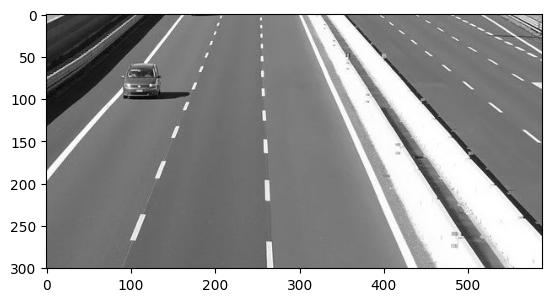

In [107]:
img = cv2.imread("carretera.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()


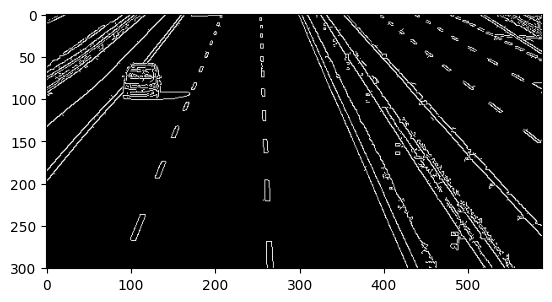

In [84]:
edges = cv2.Canny(img_gray, 50, 200)
plt.imshow(edges, cmap='gray')
plt.show()

Line Detection using Hough Transform
Number of lines detected:  41


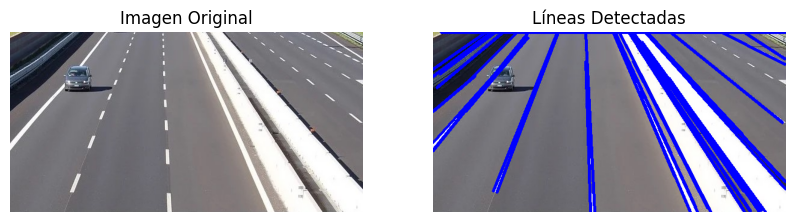

In [93]:
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, minLineLength=10, maxLineGap=250)
# Draw lines on the image
img_line = img.copy()
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(img_line, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result
print("Line Detection using Hough Transform")
print("Number of lines detected: ", len(lines))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB))
plt.title('Líneas Detectadas')
plt.axis('off')

plt.show()

Text(0.5, 1.0, 'Bordes binarios')

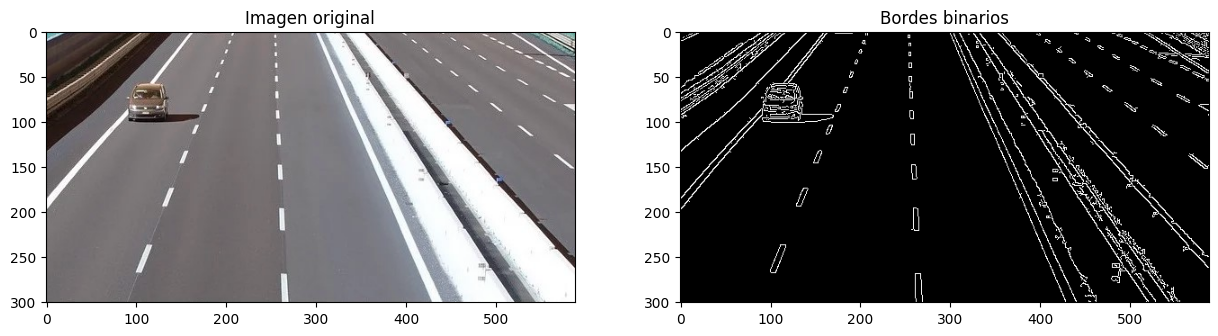

In [108]:
def hough_transform(img_edges, threshold=100):
    # Obtener dimensiones
    height, width = img_edges.shape

    # Definir el rango de ángulos
    thetas = np.deg2rad(np.arange(-90, 90))
    num_thetas = len(thetas)

    # Rango de distancias posibles
    diag_len = int(np.ceil(np.sqrt(width**2 + height**2)))  # distancia máxima posible
    rhos = np.linspace(-diag_len, diag_len, 2 * diag_len)
    num_rhos = len(rhos)

    # Crear acumulador (rho, theta)
    accumulator = np.zeros((num_rhos, num_thetas), dtype=np.uint64)

    # Encontrar los píxeles de borde (valor 1)
    y_idxs, x_idxs = np.nonzero(img_edges)  # coordenadas de píxeles blancos

    # Llenar el acumulador
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for t_idx in range(num_thetas):
            rho = int(round(x * np.cos(thetas[t_idx]) + y * np.sin(thetas[t_idx]))) + diag_len
            accumulator[rho, t_idx] += 1

    lines = []
    for r_idx in range(accumulator.shape[0]):
        for t_idx in range(accumulator.shape[1]):
            if accumulator[r_idx, t_idx] > threshold:
                rho = rhos[r_idx]
                theta = thetas[t_idx]
                lines.append((rho, theta))

    return accumulator, lines, thetas, rhos


# Aplicar Transformada de Hough
accumulator, lineas, thetas, rhos = hough_transform(edges, threshold=120)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Imagen original")

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Bordes binarios")


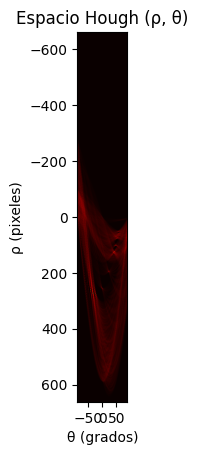

In [105]:
plt.imshow(accumulator, cmap="hot", extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
plt.title("Espacio Hough (ρ, θ)")
plt.xlabel("θ (grados)")
plt.ylabel("ρ (pixeles)")
plt.show()

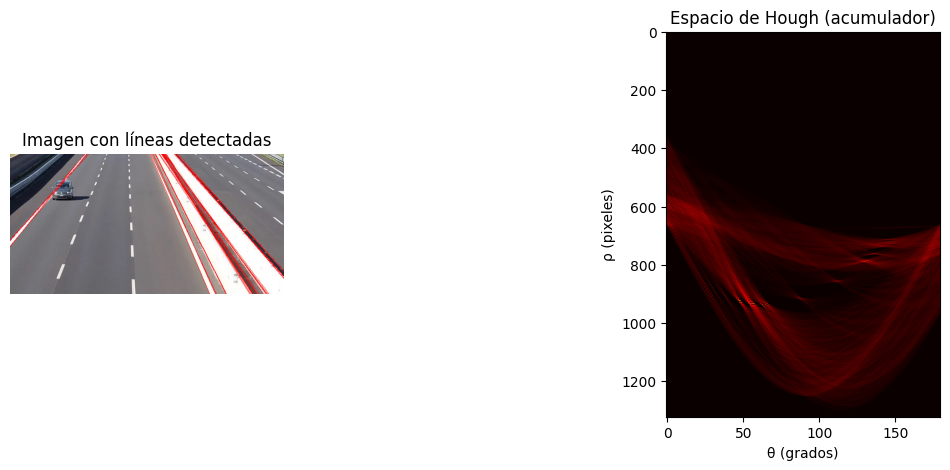

In [109]:
def draw_hough_lines(img, lines):
    img_color = img.copy()

    for (rho, theta) in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_color, (x1, y1), (x2, y2), (0, 0, 255), 1)

    return img_color


# Dibujar líneas detectadas
img_con_lineas = draw_hough_lines(img, lineas)

# Mostrar resultados
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title("Imagen con líneas detectadas")
plt.imshow(cv2.cvtColor(img_con_lineas, cv2.COLOR_BGR2RGB))
plt.axis("off")


plt.subplot(1,3,3)
plt.title("Espacio de Hough (acumulador)")
plt.imshow(accumulator, cmap='hot', aspect='auto')
plt.xlabel("θ (grados)")
plt.ylabel("ρ (pixeles)")
plt.show()
